In [2]:
import numpy
import tensorflow as tf
import random as rn

from keras import backend as K
from keras.layers import Input, merge, Dropout, Dense, Flatten, Activation
from keras.layers.normalization import BatchNormalization
from keras.models import Model

from sklearn.model_selection import KFold 
# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/keras-team/keras/issues/2280#issuecomment-306959926
'''
import os
os.environ['PYTHONHASHSEED'] = '0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.

numpy.random.seed(422)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(1245)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of
# non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)


# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(34)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

'''

import pandas
import matplotlib.pyplot as plt
from collections import Counter
import numpy
from keras.layers import Input, merge, Dropout, Dense, Flatten, Activation
from keras.layers.normalization import BatchNormalization
from keras.models import Model




The objective is to explore the training data and prepare it for a neural network. This includes removing invalid data and duplicated data; feature correlations and dimensional significances are also calculated.

In [3]:
df = pandas.read_csv('train.csv')
print('rows: ', df.shape[0], 'columns: ', df.shape[1])

rows:  4459 columns:  4993


In [4]:
columns = ['ID', 'target', '34b15f335', '20aa07010', 'b8a716ebf', 'd5308d8bc', 'bd8f989f1', '2cb4d123e', '87ffda550', '822e49b95', '5d5c5ce6d', 'c36bcacc5', '0b8e10df6', 'f115e74c0', 'ec73030f6', '8367dfc36', '251d1aa17', '963a49cdc', 'cde9c35e8', '587a5d8c3', '312832f30', 'd318bea95', '68a945b18', '99197edf2', '55d7eb6d2', 'adc70e02f', 'c38ca8ae3', '9cc5d1d8f', 'f18d3931b', 'd2919256b', '1f1f641f1', '6cd6037bd', '63c094ba4', 'b1b17b543', 'c5dacc85b', '1e9bdf471', '4da206d28', '848b67fcc', 'c69492ae6', 'd0d340214', '330006bce', '5680531f3', 'b04bab75e', '935ca66a9', 'ee7c4db36', 'e8dfb33d5', '96be55d28', '37e85aa12', '3d655b0ed', 'ba136ae3f', '133e6f674', 'ff3ebf76b', 'e078302ef', 'a79c71dc0', '8f3740670', '861076e21', '26fc93eb7', '0572565c2', '20442bac4', 'ba499c6d9', '66ace2992', '2b0fc604a', 'fb49e4212', 'f2520b601', '6619d81fc', '6186ea570', '1a67a2101', '1d9078f84', '89ca53693', 'cb42584d1', 'e9303f524', '36d35623e', 'ecb354edf', '8337d1adc', '8bd53906a', 'b603ed95d', 'ce0ee5a89', '1977eaf08', '2a50e001c', '1655bb8bb', 'ceba761ec', '0c8e0cd38', '1ea2c906f', '580f5ff06', 'cf3841208', '6eef030c1', '32c6f9aa6', 'fc99f9426', '315b44e13', '145c7b018', '44df9c106', '7e814a30d', '6fa35fbba', '4a39584e5', '3be4dad48', '6f88afe65', 'e13b0c0aa', 'fc0e5130b', 'b6f5910aa', 'dd19c0b80', 'a6fbe0987', '653ea8253', 'edc84139a', 'd6006ff44', 'e8bd579ae', 'f6c9661fc', 'b440fc661', 'd50798d34', '2b54cddfd', '87eb21c50', '08d1f69ef', '08da2f555', '7792cebe0', '64dd02e44', 'd77583e88', 'c6776639f', 'df838756c', 'e4159c59e', '8c00634d1', '193a81dce', 'd0631e6c0', '7650524a3', '57dd44c29', '1db387535', '45319105a', 'd251ee3b4', '05cc08c11', 'bdadd6c34', 'a4511cb0b', 'b98f3e0d7', '8c0a1fa32', 'bd1c19973', '1084e5813', 'b78487210', 'ce3d7595b', 'b64425521', 'b43a7cfd5', 'a39758dae', '4de164057', '024c577b9', '4d2671746', 'd421e03fd', 'ea772e115', 'b85fa8b27', '7af000ac2', 'c5aa7c575', 'b4cfe861f', 'd3245937e', '533d88707', 'ade8a5a19', '4fa7f2b3c', '0a953f97e', '155f1b1e5', '64c6eb1cb', '2a984552e', '24018f832', '2ec5b290f', '9306da53f', '44d5b820f', '0106dd950', '9884166a7', '32174174c', 'c9eda7d9c', 'cfc1ce276', '8479174c2', '961b91fe7', 'a60027bb4', '018ab6a80', 'c09edaf01', '1996a153f', '05f54f417', 'ea4887e6b', '5a1589f1a', '2cff4bf0c', '09f827f1c', '168b3e5bc', '9e3aea49a', 'eb2a78609', 'ea965bff6', '9b490abb3', 'c3f400e36', '8e8736fc8', '5fe3acd24', '7121c40ee', 'bf59c51c3', 'a459b5f7d', 'd7875bb6c', '60e9cc05b', 'f3ee34336', '1ae0db9d5', '357784061', '71aae7896', 'fd5c6c5aa', '2fc5bfa65', 'df6a71cc7', '402bb0761', '2ce2a1cdb', '58e056e12', 'e16a20511', 'b7c931383', 'e0b968d7b', 'fb6da0420', '3d6d38290', 'c16d456a7', '9f2619218', '241f0f867', 'a38ea1ca7', 'd6c82cd68', '5324862e4', '0e348d340', '4c2064b00', '62ffce458', 'cbb673163', '97b1f84fc', '2ce77a58f', 'd817823ff', '395dbfdac', '63f493dba', '1931ccfdd', '882a3da34', '398cdc105', '83635fb67', 'ebccb542e', '22dbe574a', '0e3ef9e8f', '32313055b', '13ee58af1', '1604c0735', 'a0a3c0f1b', 'a5874086d', '3f8854df3', '1a1962b67', '615cc4c17', '8cd9be80e', '42e0ec591', '5bc7ab64f', '425c08bf3', '58e2e02e6', '0f81cc1d2', 'c8ebd62ea', '5e645a169', '1351bf96e', '2b6cef19e', '860bf7c04', 'fcda960ae', 'd26279f1a', '474a9ec54', '9c3154ae6', '8de6fcbf1', '807c7f49d', '22c7b00ef', '0397f7c9b', '51c9aee7e', '7be4eb1e5', '5da2e6220', '9e7c6b515', 'acc744336', '854e37761', 'e637e8faf', '2570e2ba9', '578eda8e0', '2d3296db7', '9fd594eec', 'e78e3031b', '44f09b92d', 'be8a71172', 'a2d707f4e', '950f2c435', '266525925', '64cabb6e7', '8c1e20670', '88ef1d9a8', 'fb0f5dbfe', 'eae884486', 'bf0e69e55', 'a765da8bc', '02861e414', 'f296082ec', 'fbe583de5', '97b387235', '66146c12d', '799625b2f', 'b0c596a35', 'f8cd9ae02', 'da5814d9b', '3da5e42a7', 'f6eba969e', '7db1be063', '6562e2a2c', 'ac0e2ebd0', '0d5215715', 'db3839ab0', '91f701ba2', '6b795a2bc', '110e4132e', '601d54a3a', 'ded346ef9', '5ee81cb6e', 'ca2b906e8', '23db7d793', '703885424', '1904ce2ac', '6c5c8869c', 'ae806420c', '71b637714', 'f97d9431e', '6b041d374', 'a0453715a', '84d9d1228', 'ff793343c', '19122191d', '7da54106c', '05f1b68b8', 'e9c45d66f', 'c6e8b5b5c', '55a7e0643', '346e3d609', 'f1e0ada11', '4d3fb93d9', '38bbaa62d', '097c7841e', '59cafde1f', 'e5587ec32', '29ab304b9', 'fb02ef0ea', '371ff7a11', 'b6636b458', '885cde177', '2c42b0dce', 'ed8951a75', 'd834302b0', 'ff08cfbbe', 'dff08f7d5', 'bb6f50464', '0256b6714', '8b710e161', 'c928b4b74', '122c135ed', 'bfbc53791', '467aa29ce', '6809065b9', '892f6f03e', '74d7f2dc3', '7dcc40cda', 'aeff360c7', '9379a6483', 'a63aaf7cc', 'cacc1edae', 'e7c0a50e8', 'eeb9cd3aa', '324921c7b', 'e84c67382', '5c79d86bc', 'bc8aebe8c', '366841793', '01005e5de', 'cd180af53', 'dc10234ae', '58232a6fb', '62d0edc4f', 'c0d2348b7', 'b48cf2fd5', '547d3135b', '39b3c553a', '6a323434b', 'f8a437c00', '7acae7ae9', '491b9ee45', 'c8d582dd2', '9f7b782ac', 'a1d11c496', 'b361f589e', '9e39c29d0', '9c4073190', 'fae0ce474', '268b047cd', '67ddf8bdd', '8ff55a752', '951ef1246', 'c10f31664', '80b6e9a8b', '4c6a1accd', '4bcf15776', '70feb1494', '8dc7f1eb9', 'a79522786', '2fc60d4d9', 'adb64ff71', '0e1921717', 'c33a4095a', '23d6be31e', 'a6182b737', '5d9f43278', '73687e512', '11e12dbe8', 'eb4a20186', '3839f8553', 'fa1dd6e8c', '2c7e41e16', 'edc3f10a1', '9de83dc23', '850027e38', '469630e5c', 'e17a13988', 'b488b6a67', '382606216', '1654ab770', '453128993', '9015ac21d', '870bab627', '71a56bdae', '62e59a501', '15ace8c9f', 'bf8150471', '1d04efde3', '5c6487af1', '027e67ec7', 'a3ef69ad5', '2a3ac7716', 'bb0ce54e9', 'f9e3b03b7', '99df18cb2', 'f190486d6', '455b1d1ae', '7383ca731', 'f74e8f13d', 'fb5e1b2b7', 'c4972742d', '22d7ad48d', '4ead853dc', '4ecc3f505', '230a025ca', 'a67d02050', 'cf488d633', '1472ad855', '77deffdf0', 'b719c867c', 'a3f2345bf', '53102b93f', '7b672b310', 'c5fa49de1', 'c5a231d81', 'e176a204a', '1702b5bf0', 'ef1e1fac8', 'd4cc42c3d', '1bf6240eb', '60307ab41', '22abeffb6', '29181e29a', 'a09a238d0', '21bd61954', 'ea4046b8d', '8618bc1fd', 'a5565ec7d', '1a82869a6', 'bca395b73', '190db8488', '95aea9233', '92f32943a', '5edd220bc', '555f18bd3', '7ff7d351b', 'a34f8d443', '8b1379b36', 'c47340d97', 'e838549ac', '015c3e354', '2cb73ede7', '762cbd0ab', 'b0310a768', 'ddea5dc65', 'a3fb07bfd', 'fe919be32', 'f7f553aea', '9abffd22c', 'a396ceeb9', '4dcf81d65', '8781e4b91', '19915a6d3', '20a325694', '05f11f48f', 'ab7764ead', '23310aa6f', '1189ee335', '5831f4c76', '8675bec0b']

In [5]:
df = df[columns]
print('rows: ', df.shape[0], 'columns: ', df.shape[1])

rows:  4459 columns:  487


In [6]:
# Drop rows, columns with NaN values
df = df.dropna(0)
df = df.dropna(1)
# Drop duplicate rows
df = df.drop_duplicates()
# Drop duplicate columns
df = df.loc[:, (df != 0).any(axis=0)]

print('rows: ', df.shape[0], 'columns: ', df.shape[1])

rows:  4459 columns:  476


float64 29
26722.450921731328 569965.1830463364 0.0 20000000.0
float64 714
2569407.3683695896 9610183.07314679 0.0 319612000.0
float64 128
396896.0885131196 3238242.602922524 0.0 100000000.0
float64 395
742646.4001121327 3799941.042953336 0.0 70000000.0
int64 69
629689.616505943 6956379.912196832 0 302312000
float64 351
1249545.293097107 7361172.670623278 0.0 333800000.0
float64 268
1200041.531814308 8113234.0714170635 0.0 319612000.0
int64 24
414805.56178515364 6821762.982270194 0 300000000
int64 3
2254.7656425207447 149756.97868971963 0 10000000
int64 241
1162969.7896389326 11186912.871886052 0 516124000
float64 121
227284.0083740749 2326388.7104625977 0.0 99800000.0
int64 8
29759.027584660238 1638479.4348079076 0 108800000
float64 98
335657.4828392014 3586133.547082537 0.0 112000000.0
float64 250
888760.2366584438 5743544.197548192 0.0 148452000.0
float64 597
2409617.084081633 9125827.284724362 0.0 319612000.0
int64 2
467.81789638932497 31238.888134311266 0 2086000
float64 97
235390

float64 302
1024320.3273873065 6430820.97576868 0.0 148452000.0
float64 173
449838.81715631316 3756210.954050141 0.0 91000000.0
float64 287
905137.0059475215 5844028.653617023 0.0 132820000.0
float64 84
55299.82805561785 708267.5321104376 0.0 20000000.0
float64 186
546125.313702624 4269894.45992036 0.0 91000000.0
float64 93
93863.4024086118 1170484.6878917736 0.0 44848000.0
int64 45
152760.03588248487 2432650.8413714245 0 60000000
float64 251
725374.6631486879 5086972.9686179655 0.0 132326000.0
float64 225
610440.3095985648 4088900.2260667486 0.0 60000000.0
float64 306
1030903.3535232114 6726042.408035467 0.0 148452000.0
int64 275
2597494.954025566 20176196.951492567 0 603226000
int64 5
8729.760035882486 450747.46290630486 0 30000000
int64 2
1.3455931823278762 89.85298600475343 0 6000
float64 178
357748.6954698363 2629988.12945846 0.0 68640000.0
int64 4
10384.839650145772 628067.6918021174 0 41820000
int64 4
503.70038125140167 30165.182634456734 0 2000000
float64 257
778094.2457995065 

int64 23
57797.71249159004 1043934.8859508556 0 40000000
float64 27
395575.0915765867 8224302.408546995 0.0 300000000.0
float64 184
570246.49184122 4364635.286023245 0.0 91000000.0
float64 99
777403.9022157434 6086490.107613601 0.0 100000000.0
float64 57
211449.8971338865 2791555.363103912 0.0 97418000.0
float64 426
803935.3789100695 4177641.696535595 0.0 100000000.0
int64 17
6026.014801525005 90331.11785487764 0 2800000
int64 28
37727.27068849518 508126.56433213106 0 16000000
int64 11
114201.83897734918 4765396.73639709 0 300000000
float64 162
375861.1497151829 2998813.0438917447 0.0 104000000.0
float64 226
725588.8945817448 4177410.9047642895 0.0 80000000.0
int64 23
37473.303879793675 815380.2879076874 0 40000000
int64 29
41989.235254541374 1062080.360271366 0 45600000
int64 67
442233.70082978247 7763962.169927509 0 360000000
int64 83
587880.2422067728 7122088.99513072 0 214400000
float64 163
324756.77761381486 2913544.48095214 0.0 70000000.0
float64 125
326791.9357793227 2455199.985

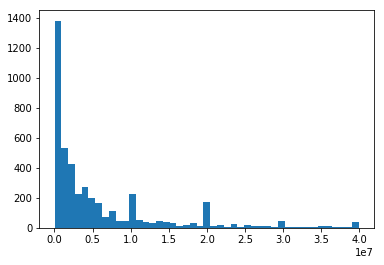

In [7]:
# normailze numerical columns
y_true = df['target'].tolist()

for column in df.columns:
    if column not in ['ID', 'target']:
        y_max = df[column].max()
        y_min = df[column].min()
        y_std = df[column].std()
        y_mean = df[column].mean()
        print(df[column].dtype,len(set(df[column].tolist())))
        print(y_mean, y_std, y_min, y_max)
        #df[column] =  0.5*(numpy.tanh(0.01*(numpy.array(df[column]) - y_mean)/y_std) + 1)    

        df[column] =  (df[column] - df[column].mean()) / (df[column].max() - df[column].min())

#df['target'] =  0.5[tanh(0.01(s-μ)/σ + 1]        
y_max = df['target'].max()
y_min = df['target'].min()
y_std = df['target'].std()
y_mean = df['target'].mean()


plt.hist(df['target'], bins='auto')
                         
                         
#df['target'] =  0.5*(numpy.tanh(0.01*(numpy.array(df['target']) - y_mean)/y_std) + 1)    
                       
df['target'] = (df['target'] - y_mean)/(y_max - y_min)

30000.0 40000000.0 5944923.322036331 8234311.501629634
-0.14798407110423645
0.8520159288957635
3.046328483132718e-17
0.20601229676331373


(array([1381.,  534.,  425.,  224.,  269.,  198.,  168.,   69.,  113.,
          45.,   48.,  224.,   55.,   41.,   31.,   47.,   37.,   30.,
          13.,   18.,   29.,    9.,  169.,   14.,   20.,    7.,   23.,
           4.,   17.,   15.,   11.,   12.,    3.,   43.,    7.,    7.,
           8.,    4.,    5.,   11.,   12.,    6.,    5.,    6.,   42.]),
 array([-0.14798407, -0.12576185, -0.10353963, -0.0813174 , -0.05909518,
        -0.03687296, -0.01465074,  0.00757148,  0.02979371,  0.05201593,
         0.07423815,  0.09646037,  0.1186826 ,  0.14090482,  0.16312704,
         0.18534926,  0.20757148,  0.22979371,  0.25201593,  0.27423815,
         0.29646037,  0.3186826 ,  0.34090482,  0.36312704,  0.38534926,
         0.40757148,  0.42979371,  0.45201593,  0.47423815,  0.49646037,
         0.5186826 ,  0.54090482,  0.56312704,  0.58534926,  0.60757148,
         0.62979371,  0.65201593,  0.67423815,  0.69646037,  0.7186826 ,
         0.74090482,  0.76312704,  0.78534926,  0.80757148,

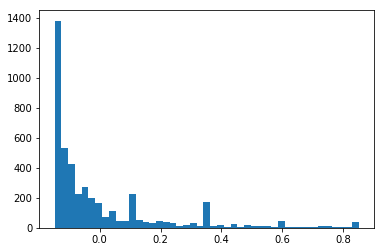

In [82]:
print(y_min, y_max, y_mean, y_std)

print(df['target'].min())
print(df['target'].max())
print(df['target'].mean())
print(df['target'].std())

plt.hist(df['target'], bins='auto')

30000.0 40000000.0 5944923.322036331 8234311.501629634
30000.0 40000000.0
-0.14798407110423645 0.8520159288957635 3.046328483132718e-17


Text(0,0.5,'Frequency')

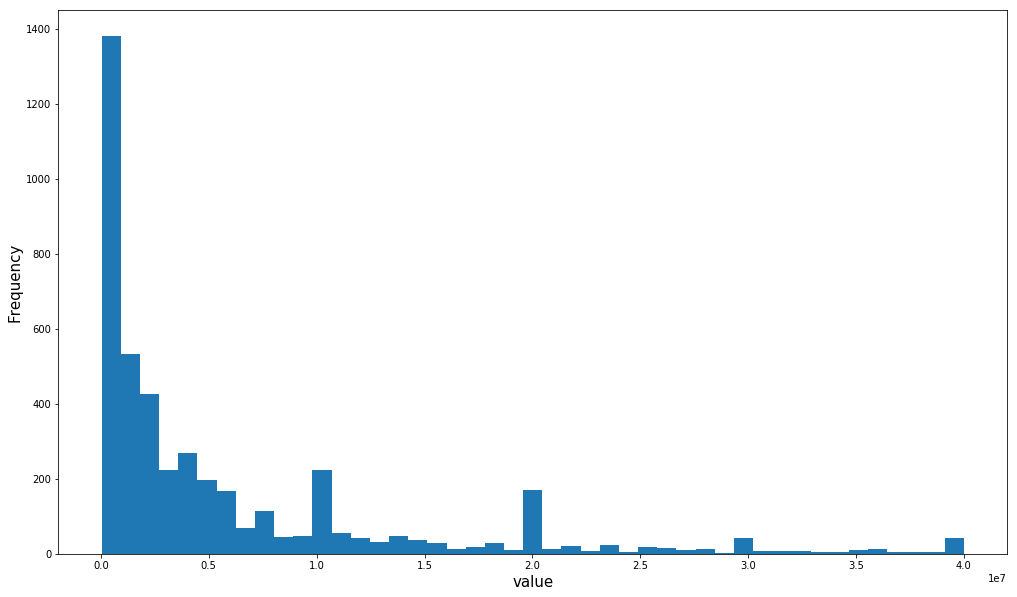

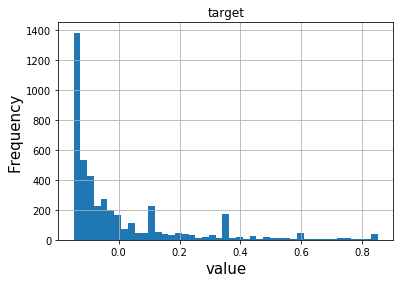

In [83]:
print(y_min, y_max, y_mean, y_std)
fig = plt.figure(figsize=(17,10))
#y_true.hist()
plt.hist(y_true, bins='auto')
print(min(y_true), max(y_true))
plt.xlabel("value",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
#plt.xlim([-1.0,1.0])

df.hist('target', bins='auto')
print(df['target'].min(), df['target'].max(), df['target'].mean())
plt.xlabel("value",fontsize=15)
plt.ylabel("Frequency",fontsize=15)



The data has already been processed so there aren't any NaN values or duplicate rows. There are however duplicate columns.

In [84]:
data_types = df.dtypes.tolist()
distribution = Counter(data_types)

In [85]:
print(distribution)
print(data_types)

Counter({dtype('float64'): 475, dtype('O'): 1})
[dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dty

The data is very nice, it's all ints or floats. Let's divide the data into x and y training data.

In [86]:
x_train = df.drop(columns = ['ID', 'target'])
y_train = df['target']

columns = x_train.columns
len(columns)

# The training set is one-to-one with the expection of one row.
#print('rows: ', x_train.shape[0], 'columns: ', x_train.shape[1])
#x_train = x_train.drop_duplicates()
#print('rows: ', x_train.shape[0], 'columns: ', x_train.shape[1])


474

In [ ]:
# Plot the Correlations
#import numpy
#f, ax = plt.subplots(figsize=(10, 8))
#corr = x_train.corr()
#sns.heatmap(corr, mask=numpy.zeros_like(corr, dtype=numpy.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           # square=True, ax=ax)

Now it's time to find the most import features using out of the box decisiontreeregressor

In [87]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.1.


474


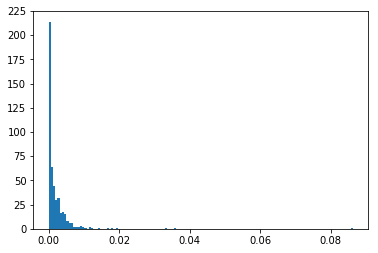

In [88]:
from sklearn.tree import ExtraTreeRegressor

random_state = 42
model = ExtraTreeRegressor(random_state=random_state)
model.fit(x_train, y_train)
#print(model.score(x_train, y_train))
feature_importance = model.feature_importances_
plt.hist(feature_importance, bins='auto')
#print(features)
features_weight = []
for _ in zip(list(x_train.columns), feature_importance):
    features_weight.append((_[0], _[1]))

# what is this line doing?
features = sorted(features_weight, key=lambda x: x[1])[::-1]
print(len(features))

In [89]:
n_feature = 20
#n_feature = 50
top_features = [feature[0] for feature in features[:n_feature]]
print(len(top_features))
print(top_features)
x_train = x_train[top_features]
print(x_train)

20
['5bc7ab64f', '15ace8c9f', 'f190486d6', '20aa07010', '58e2e02e6', 'c928b4b74', 'eeb9cd3aa', 'e78e3031b', '26fc93eb7', '9fd594eec', 'eb4a20186', 'e078302ef', 'b64425521', '13ee58af1', 'edc84139a', '5c6487af1', '4ecc3f505', '1702b5bf0', '491b9ee45', 'ddea5dc65']
      5bc7ab64f  15ace8c9f  f190486d6  20aa07010  58e2e02e6  c928b4b74  \
0     -0.008926   0.005097  -0.002185  -0.008039   0.029771  -0.004743   
1     -0.008926  -0.007731  -0.008025  -0.001156   0.000934  -0.004743   
2     -0.008926  -0.007731  -0.008025  -0.008039  -0.007983  -0.004743   
3     -0.008926  -0.007731  -0.001768  -0.008039  -0.007983   0.001514   
4     -0.008926  -0.007731  -0.008025  -0.001782  -0.007983  -0.004743   
5     -0.008926  -0.005991  -0.008025   0.045213  -0.007983  -0.004743   
6     -0.008926  -0.007731  -0.007994  -0.008039  -0.007971  -0.004712   
7     -0.008926  -0.007731  -0.008025  -0.008039  -0.007983  -0.004743   
8     -0.008526  -0.007731   0.002404  -0.007858   0.004298   0.005686

5bc7ab64f
-0.008925869562906483 0.9910741304370936 -5.7601067022454824e-18 0.06264368544444048
15ace8c9f
-0.007730643241033703 0.9922693567589663 -1.4472238911490742e-19 0.029296923124774506
f190486d6
-0.008025398463822518 0.9919746015361774 -1.3316794030653982e-17 0.027867255036089656
20aa07010
-0.008039145490061668 0.9919608545099383 -3.923066053319157e-18 0.030068279892953857
58e2e02e6
-0.007983196632504711 0.9920168033674953 6.3234347114884556e-18 0.02901066064661869
c928b4b74
-0.004743270518332026 0.9952567294816679 -4.44632307847924e-18 0.026386654291613673
eeb9cd3aa
-0.007845299369320803 0.9921547006306791 1.5300891300777713e-17 0.02838326861279401
e78e3031b
-0.004012324969970808 0.9959876750300292 -1.6586275100873558e-17 0.026258751671230905
26fc93eb7
-0.020334509788001127 0.9796654902119989 -2.38714134303514e-17 0.06764553456080069
9fd594eec
-0.021074014651993943 0.9789259853480061 4.5147160784964454e-17 0.06644898511901412
eb4a20186
-0.006388823885443443 0.9936111761145566 1.

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


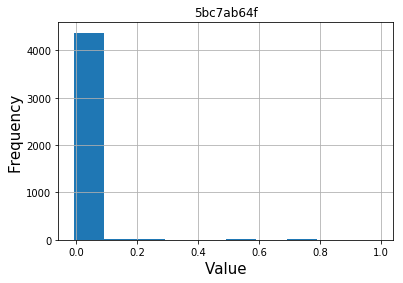

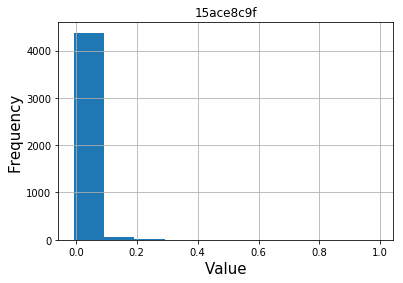

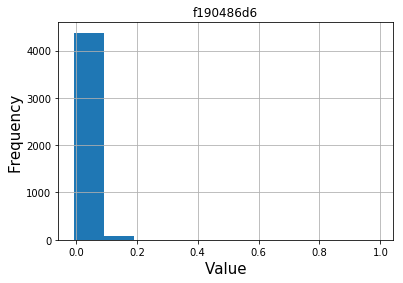

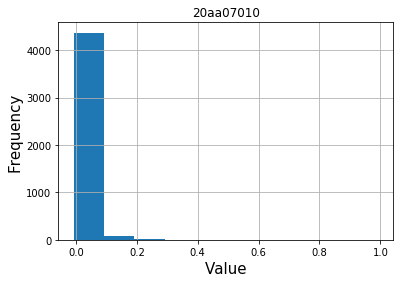

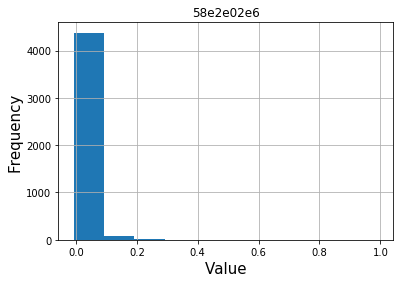

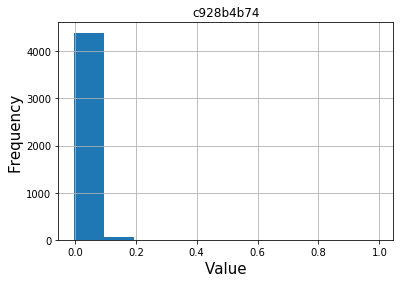

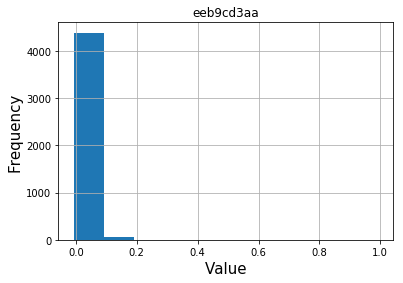

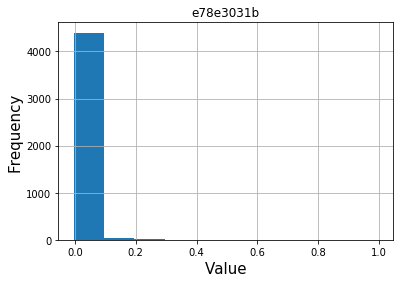

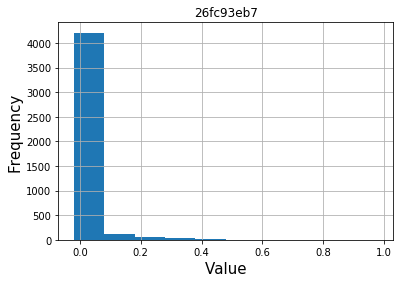

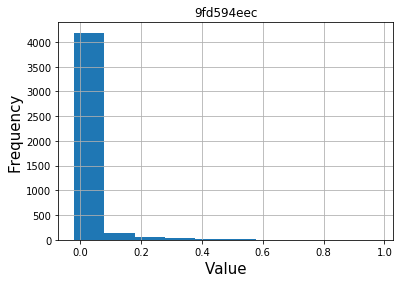

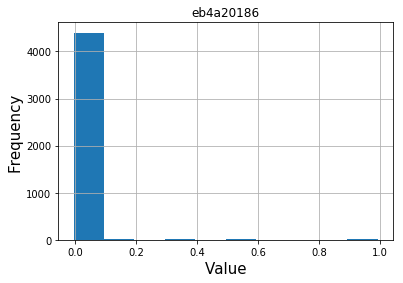

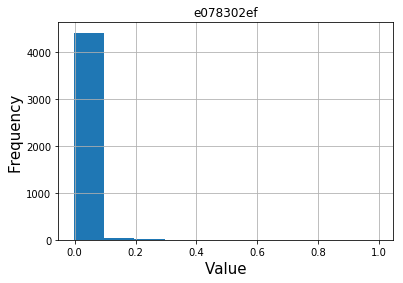

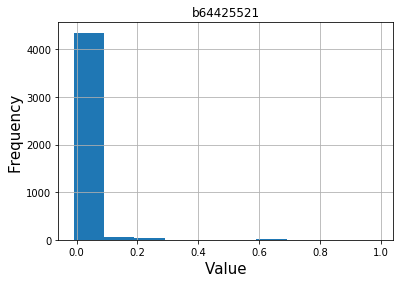

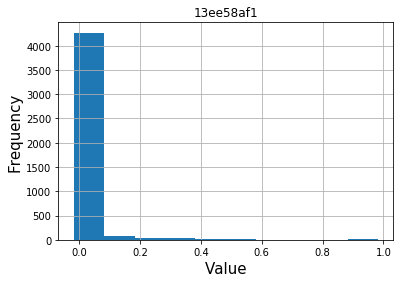

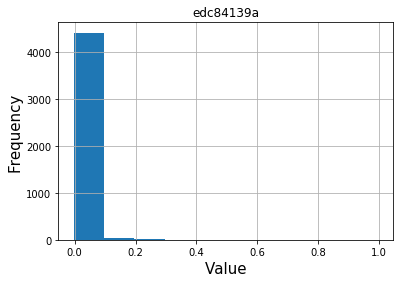

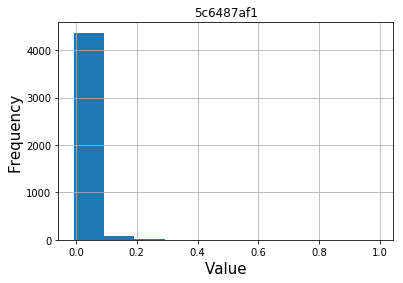

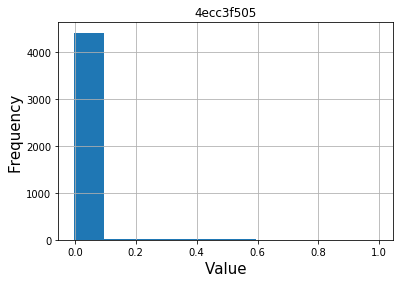

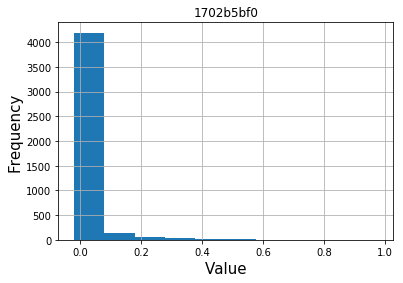

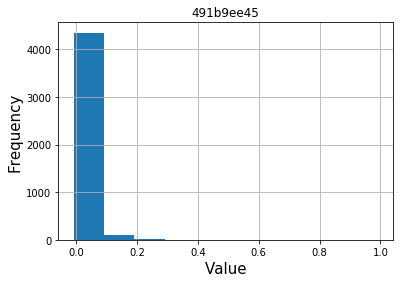

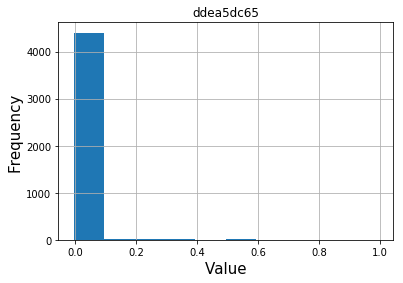

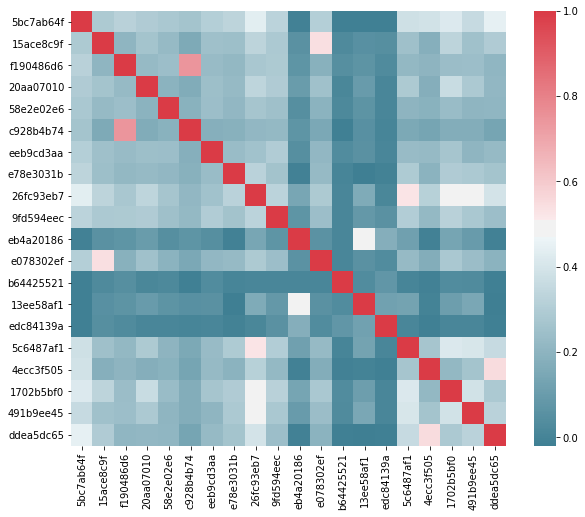

In [91]:
import seaborn as sns
for column in x_train:
    print(column)
    x_train.hist(column)
    
    # whats the difference between .hist and plt.hist??
    #col = x_train[column].tolist()
    #plt.hist(x_train[column], bins='auto')
    print(x_train[column].min(), x_train[column].max(), x_train[column].mean(), x_train[column].std())
    plt.xlabel("Value",fontsize=15)
    plt.ylabel("Frequency",fontsize=15)

f, ax = plt.subplots(figsize=(10, 8))
corr = x_train.corr()
sns.heatmap(corr, mask=numpy.zeros_like(corr, dtype=numpy.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [92]:
def root_mean_squared_logarithmic_error(y_true, y_pred):
        print(y_true, y_pred)
        #return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

        return K.sqrt(K.mean(K.square(-tf.log1p(y_pred) + tf.log1p(y_true)), axis=-1)) 

#print(root_mean_squared_logarithmic_error(.555, .424))

In [93]:
def simple_nn(n_columns):

    inputs = Input((n_columns,))

    x = Dense(512)(inputs)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Dense(64)(inputs)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)    
    
    x = Dropout(.55)(x)
    
    x = Dense(1)(x)
   # x = Activation('relu')(x)
        
    model = Model(inputs, x, name='simple_net')
    model.compile(optimizer = "rmsprop", loss = root_mean_squared_logarithmic_error, metrics=['accuracy'])    
    return model


In [94]:
model = simple_nn(n_feature)


kf = KFold(n_splits=3, random_state=42, shuffle=True)
kf.get_n_splits(x_train)
 
for train_index, test_index in kf.split(x_train):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = numpy.array(x_train)[train_index], numpy.array(x_train)[test_index]
    Y_train, Y_test = numpy.array(y_train)[train_index], numpy.array(y_train)[test_index]

    x = model.fit(X_train, Y_train,  validation_data=(X_test, Y_test), batch_size=64, epochs=12)

i=len(x_train)
x = model.predict(x_train[:i])

#print(x)

x_mean = numpy.mean(x)
x_std = numpy.std(x)
#print(x[0])

print(x_mean, x_std ,numpy.min(x), numpy.max(x))
print(numpy.mean(y_train[:i]),numpy.std(y_train[:i]),min(y_train[:i]), max(y_train[:i]))

y_pred = []
y_true_p = []
for _, y in enumerate(y_train[:i].tolist()):
   # print(y,x[_][0])
    y_true_p.append(y*(y_max - y_min) + y_mean)
    y_pred.append(x[_][0]*(y_max - y_min) + y_mean)

    #y_pred.append(100*y_std*numpy.arctanh(2*(x[_][0]) - 1) + y_mean)
    #y_true_p.append(100*y_std*numpy.arctanh(2*(y) - 1) + y_mean)
    #y_pred.append(100*y_std*numpy.arctanh(2*(x[_][0]) - 1) + y_mean)
    
y_pred = numpy.array(y_pred)
y_true_p = numpy.array(y_true_p)  
print(y_true_p)

print(y_pred)


Tensor("dense_3_target:0", shape=(?, ?), dtype=float32) Tensor("dense_3/BiasAdd:0", shape=(?, 1), dtype=float32)
TRAIN: 2972 TEST: 1487
Train on 2972 samples, validate on 1487 samples
Epoch 1/12
2972/2972 [==============================] - 0s 136us/step - loss: 0.1228 - acc: 0.0000e+00 - val_loss: 0.1135 - val_acc: 0.0000e+00
Epoch 2/12
2972/2972 [==============================] - 0s 38us/step - loss: 0.1160 - acc: 0.0000e+00 - val_loss: 0.1103 - val_acc: 0.0000e+00
Epoch 3/12
2972/2972 [==============================] - 0s 38us/step - loss: 0.1140 - acc: 0.0000e+00 - val_loss: 0.1078 - val_acc: 0.0000e+00
Epoch 4/12
2972/2972 [==============================] - 0s 38us/step - loss: 0.1127 - acc: 0.0000e+00 - val_loss: 0.1082 - val_acc: 0.0000e+00
Epoch 5/12
2972/2972 [==============================] - 0s 38us/step - loss: 0.1130 - acc: 0.0000e+00 - val_loss: 0.1067 - val_acc: 0.0000e+00
Epoch 6/12
2972/2972 [==============================] - 0s 39us/step - loss: 0.1107 - acc: 0.0000e+0

In [96]:
#print(y_pred)
#print(y_train)
#print(y_true_p,y_pred)

m = []
for _ in range(i):
    x = numpy.square(-numpy.log(abs(y_pred[_]) + 1) + numpy.log(y_true_p[_] + 1))
    if not numpy.isnan(x):
        m.append(x)
    else:
        print('NIGGAWHAT')
        
print(numpy.sqrt(numpy.mean(numpy.square(-numpy.log(numpy.abs(y_pred) + 1) + numpy.log(y_true_p + 1)))))
#print(((y_pred - y_true_p)**2))

#print(numpy.sqrt(numpy.mean((((y_pred - y_true_p)**2)))))

#print(y)
    #print(y*(y_max - y_min) + y_mean)
    
#100*y_std*numpy.arctanh(2*.5 - 1) + y_mean    

1.6292034030170635


In [ ]:
test_set = pandas.read_csv('test.csv', nrows=10)
ids = test_set['ID']

print('rows: ', test_set.shape[0], 'columns: ', test_set.shape[1])

# Drop rows, columns with NaN values
test_set = test_set.dropna(0)
test_set = test_set.dropna(1)
# Drop duplicate rows
test_set = test_set.drop_duplicates()
# Drop duplicate columns
test_set = test_set.loc[:, (test_set != 0).any(axis=0)]

print('rows: ', test_set.shape[0], 'columns: ', test_set.shape[1])
#print(test_set.columns.tolist())
x_test = test_set[top_features]




for column in x_test.columns:
    if column not in ['ID', 'target']:
        
        x_max = x_test[column].max()
        x_min = x_test[column].min()
        x_mean = x_test[column].mean()
        #print(len(set(y_test[column])))
        x_test[column] = (x_test[column] - x_mean)/(x_max - x_min)
        print(x_test[column].dtype,len(set(x_test[column].tolist())))

        print(df[column].dtype,len(set(df[column].tolist())))

        x_test.hist(column)
        plt.xlabel("value",fontsize=15)
        plt.ylabel("Frequency",fontsize=15)

f, ax = plt.subplots(figsize=(10, 8))
corr = x_test.corr()
sns.heatmap(corr, mask=numpy.zeros_like(corr, dtype=numpy.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
        
        
Y = model.predict(x_test[:i])

y_test = []
for y in Y:
    y_test.append(y*(y_max - y_min) + y_mean)
print(y_test)



rows:  10 columns:  4992
rows:  10 columns:  486
float64 2
float64 191


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


float64 4
float64 725
float64 2
float64 765
float64 2
float64 714
float64 2
float64 776
float64 2
float64 387
float64 2
float64 755
float64 2
float64 247
float64 2
float64 616
float64 2
float64 739
float64 2
float64 156
float64 3
float64 353
float64 3
float64 224
float64 2
float64 323
float64 2
float64 387
